In [ ]:
import numpy as np
from loguru import logger
from glob import glob
import os
import os.path as osp
import mmcv
from avcv.coco import *

import argparse

datasets = [
    # ('/data/DMS_Behavior_Detection/Action_Eating_frames/annotations/instances_default.json', 
    #     '/data/DMS_Behavior_Detection/Action_Eating_frames/images', 'behavior'),
    # ('/data/cvat-annotations/27_20_2022/train.json', '/data/cvat-raw-images/', 'cvat_train'),
    ('/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/mobile_cigarette_train_081522_finetuning.json', 
        '/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/', 'mobile-train'), #mobile-train
    ('/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/mobile_cigarette_val_080422.json', 
        '/data/DMS_Behavior_Detection/Mobile_Cigarret_DB/', 'mobile-val'), # mobile-val
    ('/data/DMS_Behavior_Detection/annotations/cvat_train_27_10_2022.json', '/data/DMS_Behavior_Detection/images/', 'cvat-food-train'),
    ('/data/public/coco/annotations/instances_train2017.json', '/data/public/coco/train2017/', 'coco-food-train'),
    ('/data/public/coco/annotations/instances_val2017.json', '/data/public/coco/val2017/', 'coco-food-val'),
    # ('/data/full-version-vip-pro/annotations/train.json', '/data/full-version-vip-pro/DMS_DB_090922/', 'face')
]
new_root_dir = '/data/DMS_Behavior_Detection/annotations/'
new_img_dir = '/data/DMS_Behavior_Detection/images/'
mmcv.mkdir_or_exist(new_root_dir)

cats = []
for ann, _,_ in datasets:
    for cat in mmcv.load(ann)['categories']:
        cats.append(cat['name'])

print(sorted(set(cats)))

['airplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'cigarette', 'clock', 'couch', 'cow', 'cup', 'dining table', 'dog', 'donut', 'elephant', 'fire hydrant', 'food/drink', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorcycle', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'phone', 'pizza', 'potted plant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tv', 'umbrella', 'vase', 'wine glass', 'zebra']


In [ ]:
category_old_to_new = {
    'cigarette':'cigarette',
    'food/drink':'food/drink',
    'phone':'phone',
    'cell phone': 'phone',
    'donut':'food/drink',
    'hot dog':'food/drink',
    'pizza':'food/drink',
    'wine glass':'food/drink',
    'orange':'food/drink',
    'cake':'food/drink',
    'banana':'food/drink',
    'sandwich':'food/drink',
    'apple':'food/drink',
    # 'left_eye':'left_eye',
    # 'right_eye':'right_eye',
    # 'mouth':'mouth',
    # 'face':'face'
}

# categories = []
# used_names = set()
# for id, name in enumerate(category_old_to_new.values()):
#     if not name in used_names:
#         categories += [{'id':id+1, 'name':name} ]
#         used_names.add(name)
    
name2cat = {cat:i+1 for i,cat in enumerate(['phone', 'cigarette', 'food/drink'])}
categories = [{'id':i, 'name':name} for name, i in name2cat.items()]
categories

[{'id': 1, 'name': 'phone'},
 {'id': 2, 'name': 'cigarette'},
 {'id': 3, 'name': 'food/drink'}]

In [ ]:
from avcv.all import *
out_dict = dict(
    images=[],
    annotations=[],
    categories=categories,
)
for json, img_dir, dname in datasets:
    cc = CocoDataset(json, img_dir)
    for img_id in cc.img_ids:
        img = cc.gt.imgs[img_id].copy()
        new_img_id = len(out_dict['images'])
        new_img = img.copy()
        new_img['id'] = new_img_id
        new_img['dataset_name'] = dname
        abs_file_name = os.path.abspath(osp.join(cc.img_dir, img['file_name']))
        rel_path = os.path.relpath(abs_file_name, new_img_dir)
        new_img['file_name'] = rel_path
        
        new_img['width'], new_img['height'] = Image.open(file_name).size
        out_dict['images'].append(new_img)

        take = False
        for ann in cc.gt.imgToAnns[img_id]:
            ann = ann.copy()
            ann['image_id'] = new_img_id
            old_cat_name = cc.gt.cats[ann['category_id']]['name']
            # Only wanted old class will be taken
            if old_cat_name in category_old_to_new:
                new_cat_name = category_old_to_new[old_cat_name]
                ann['category_id'] = name2cat[new_cat_name]
                ann['id'] = len(out_dict['annotations'])
                ann['area'] = ann['bbox'][2]*ann['bbox'][3]
                out_dict['annotations'].append(ann)
                take = True

len(out_dict['images'])

165596

In [ ]:
out_dict['categories'] = categories


In [ ]:
newcc = CocoDataset(out_dict, new_img_dir)

'/data/DMS_Behavior_Detection/images/'

In [ ]:
img_ids = list(newcc.gt.imgToAnns.keys())
out_dict['images'] = newcc.gt.loadImgs(img_ids)

In [ ]:
mmcv.dump(out_dict, '/data/DMS_Behavior_Detection/annotations/train_3class_phone_cigarette_food_with_coco.json')

2022-09-29 15:50:32.281 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


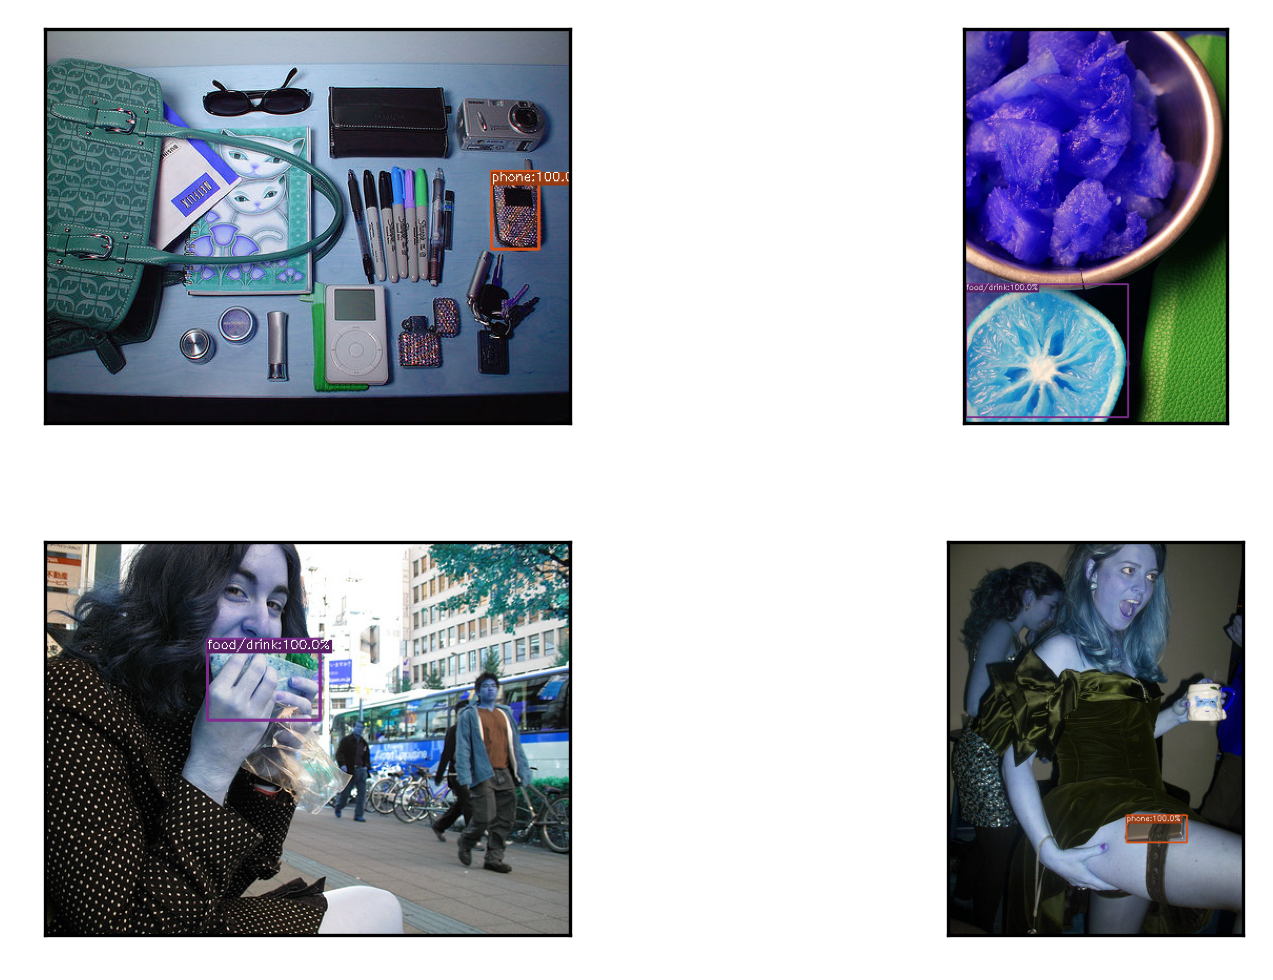

2022-09-29 15:50:32.864 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


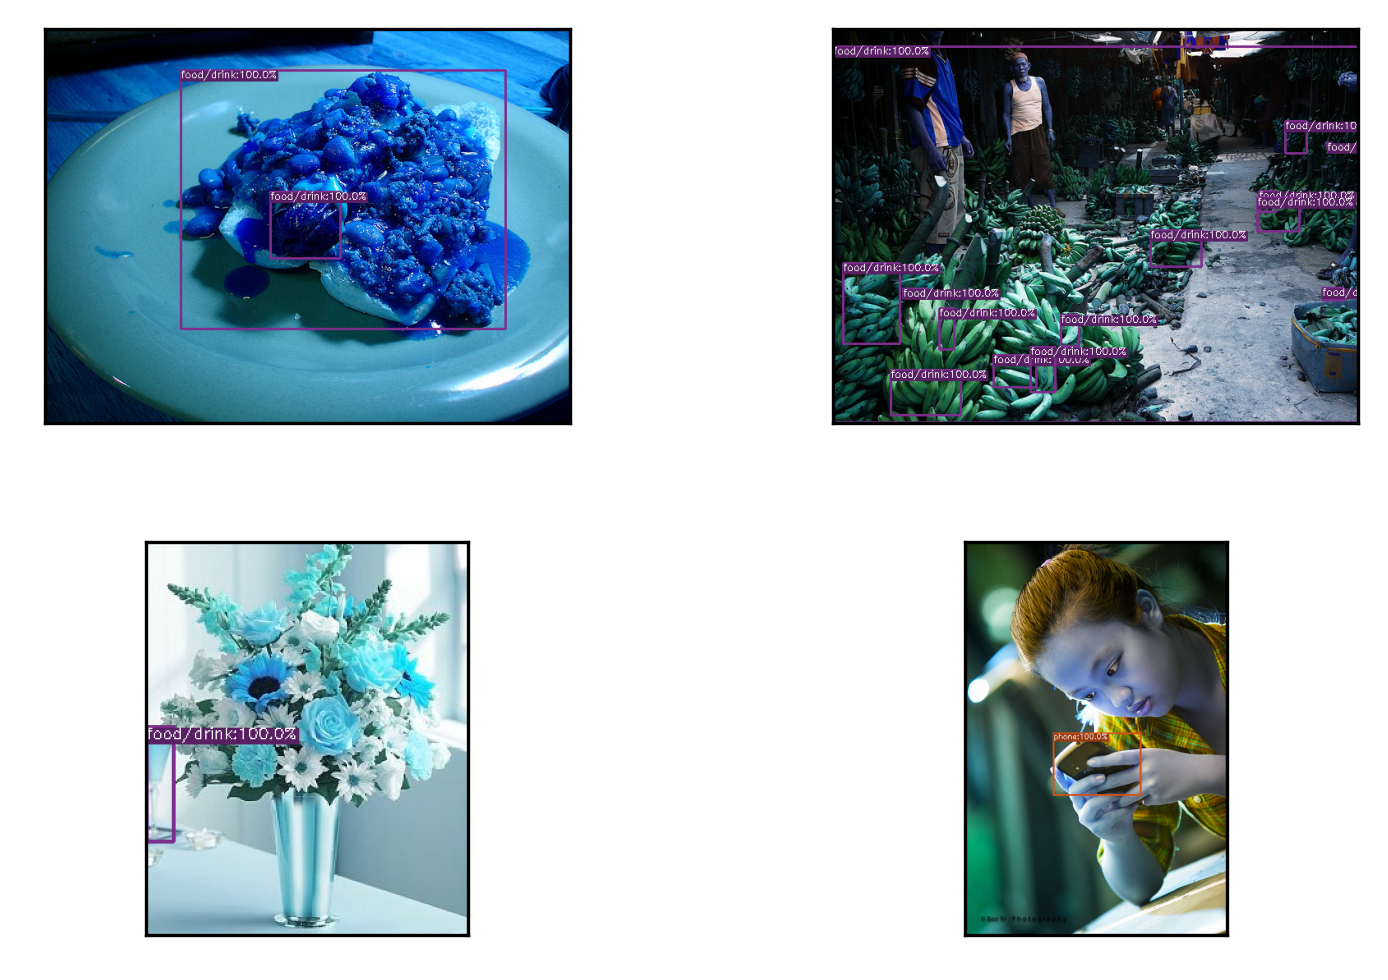

2022-09-29 15:50:33.472 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


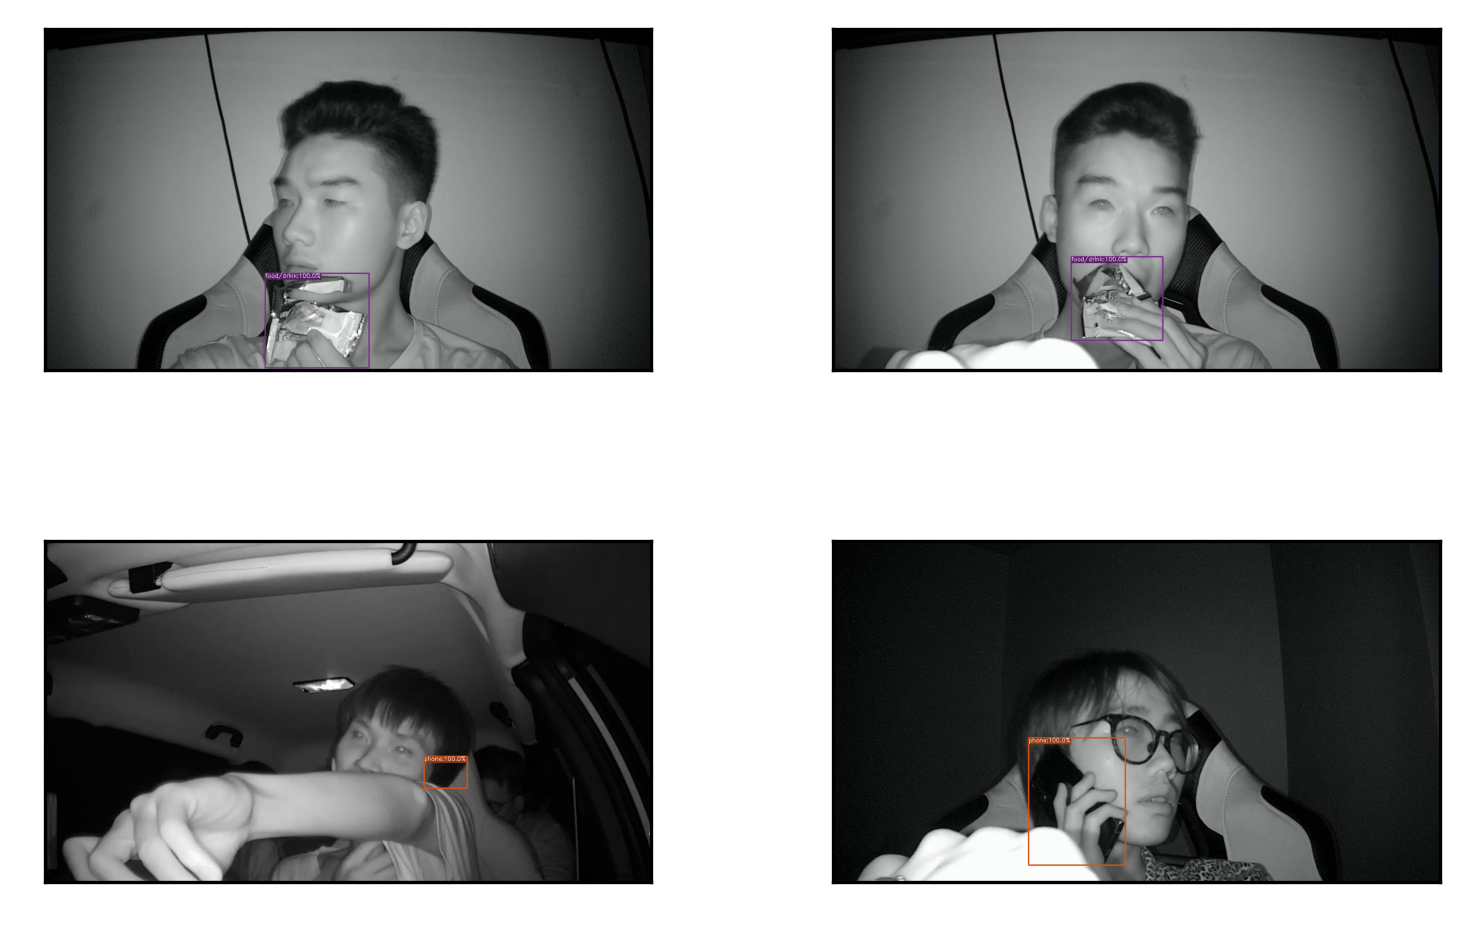

2022-09-29 15:50:34.282 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


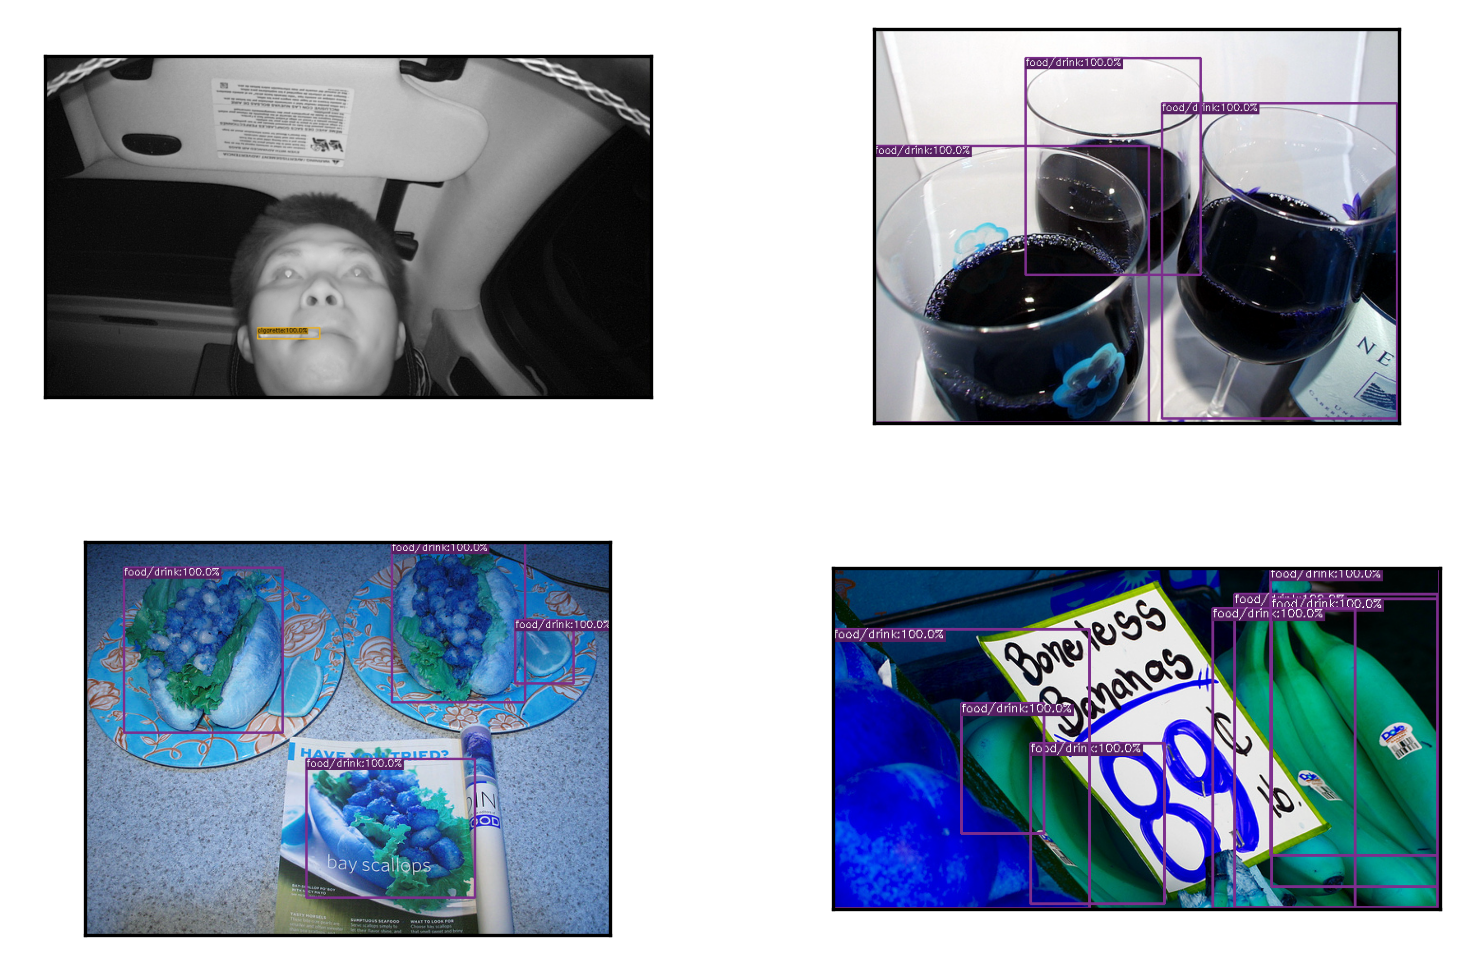

2022-09-29 15:50:35.061 | INFO     | avcv.visualize:plot_images:30 - Grid size: (2, 2)


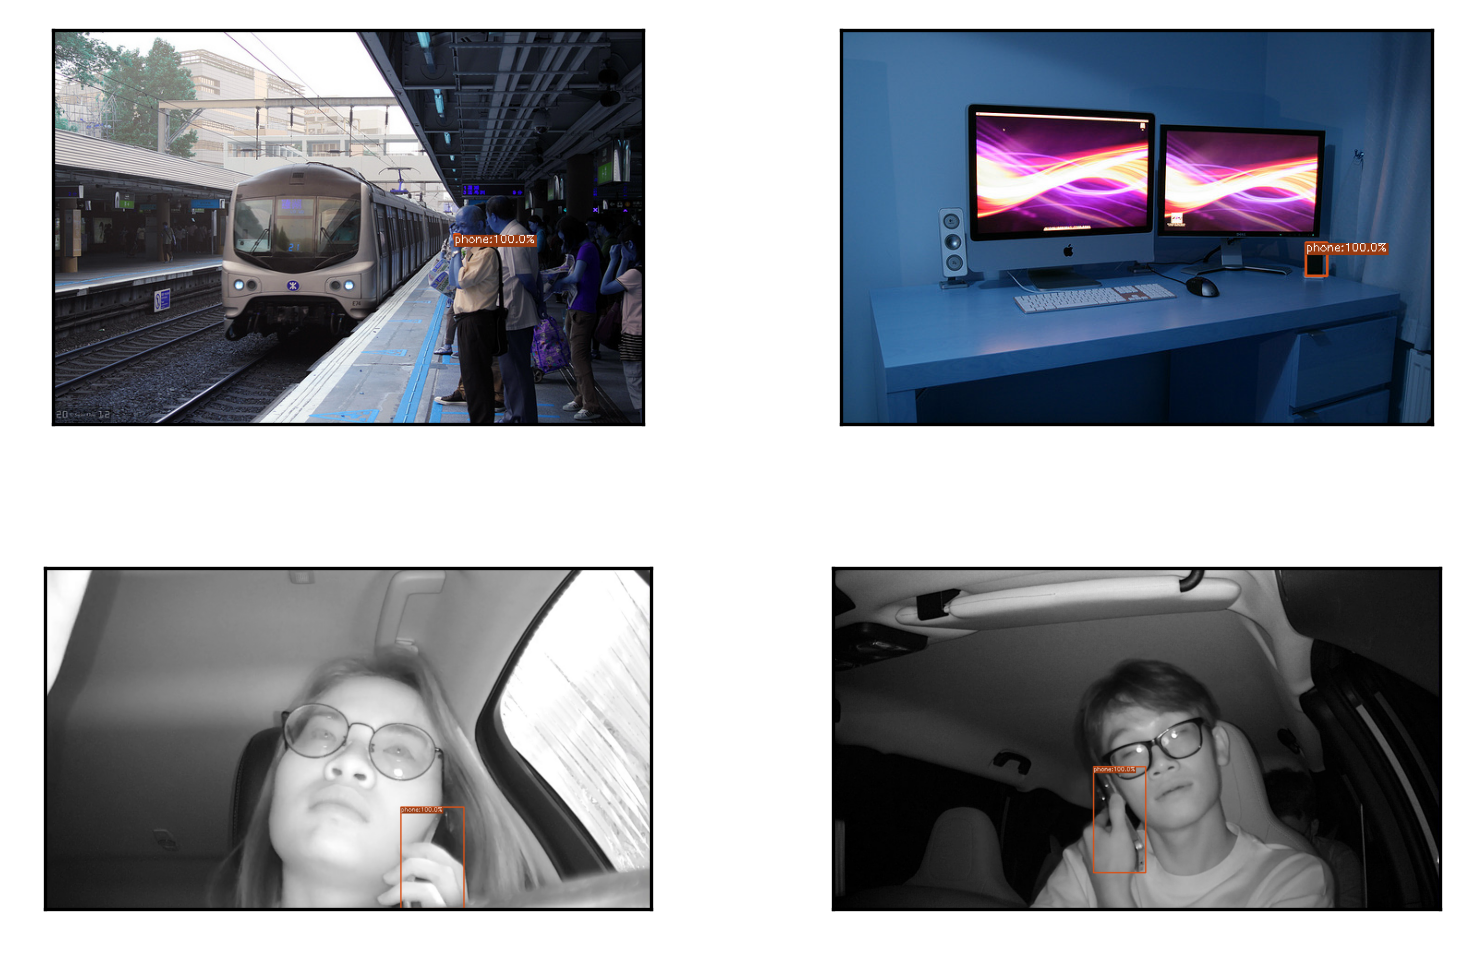

In [ ]:
vis_imgs = []
for i in range(20):
    j = np.random.choice(len(img_ids))çç
    img_id = img_ids[j]
    vis_imgs.append(newcc.visualize(img_id=img_id, show=0))
    if len(vis_imgs) == 4:
        plot_images(vis_imgs)
        vis_imgs = []